# Introduction to K-Means Clustering:

**K-Means clustering is one of the most widely used unsupervised machine learning algorithms that form clusters of data based on the similarity between data instances.**

###For full documentation:
[KMeans Clusering using Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

## 1. Importing Dependencies

In [1]:
  import numpy as np
  import pandas as pd
  from sklearn import datasets
  import matplotlib.pyplot as plt

## 2. Loading Iris Data

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Investigating the shape of our iris dataframe
iris_df.shape

(150, 4)

In [4]:
# Getting information about our iris dataframe
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


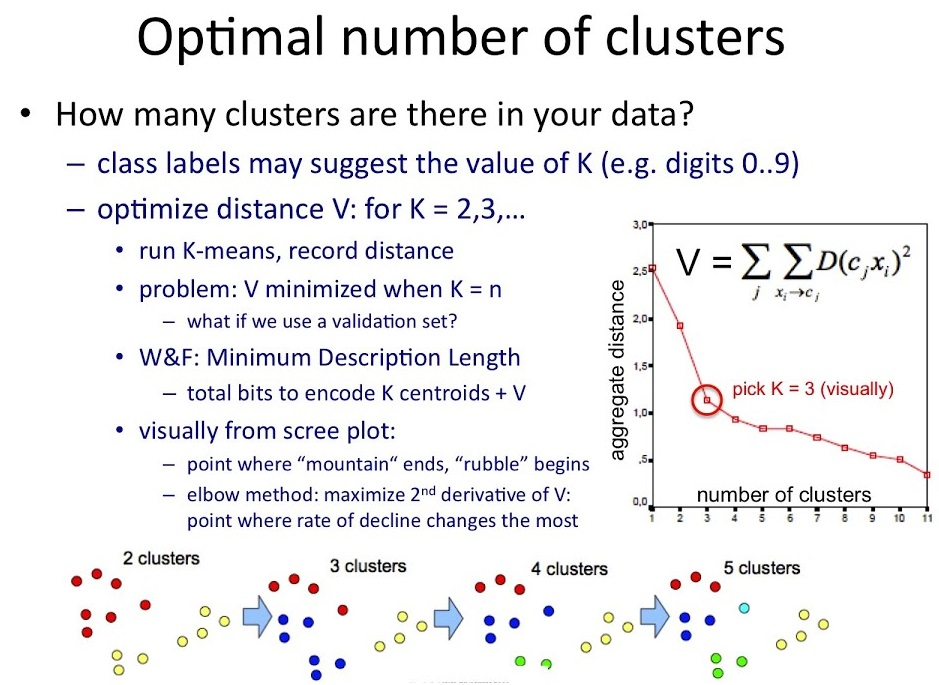

### Optimal Number of Clusters for K-Means Clustering:
Determining the optimal number of clusters in a data set is a fundamental issue in partitioning clustering, such as k-means clustering, which requires the user to specify the number of clusters k to be generated.

#### There are two methods which are commonly used:
1. Direct methods: consists of optimizing a criterion, such as the within cluster sums of squares or the average silhouette. The corresponding methods are named 'elbow' and 'silhouette' methods, respectively.

2. Statistical testing methods: consists of comparing evidence against null hypothesis. As an example is the 'gap statistic.

In [5]:
# Finding the Optimal Number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(
      n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0
  )
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

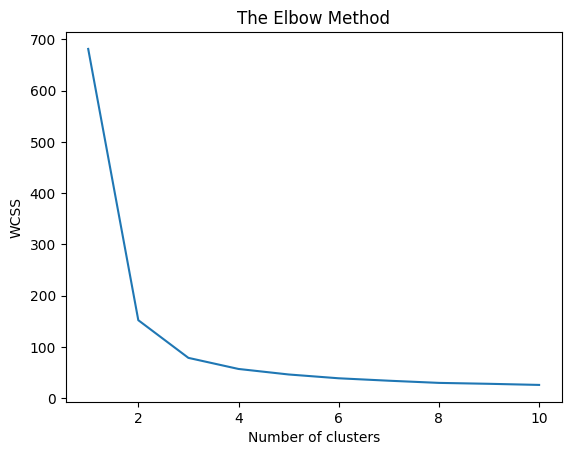

In [10]:
# Plotting the results onto a linear graph, to observe the "elbow method"
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### From the aforementioned graph we choose 3 clusters to be the optimal number of clusters

In [11]:
# Appliyng KMeans to the dataset / Creating the KMeans Classifier
kmeans = KMeans(
    n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0
)
y_kmeans = kmeans.fit_predict(x)

In [12]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 3. Visualising the Clusters

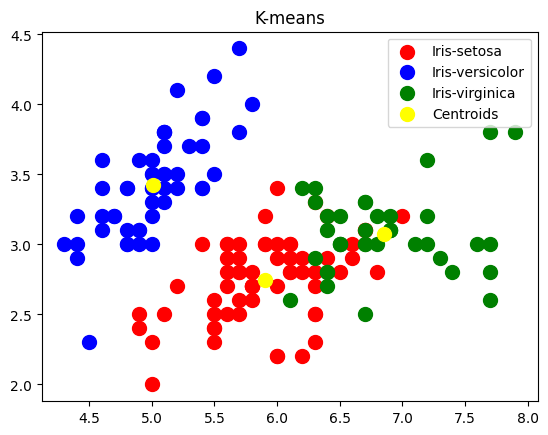

In [13]:
# Visualizing the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = "red", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = "blue", label = "Iris-versicolor")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = "green", label = "Iris-virginica")

# Plotting the Centroids of the Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = "yellow", label = "Centroids")
plt.title("K-means")
plt.legend()
plt.show()